<a href="https://colab.research.google.com/github/sakshee99/The-Sparks-Foundation/blob/main/Task1_data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1- **Prediction using Supervised ML**<br>
In this task , we have a dataset that conatins two variables( hours and scores). We will use **linear regression model** to train our algorithm. And then we will do the prediction of scores obtained based on number of hours studied.<br><br>
I have used python.

**Submitted by- Sakshee Singh**

First, we are importing all the neccesary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will read the csv file and store it as a dataframe.Also we will display first 5 rows of the dataframe.

In [2]:
data= pd.read_csv("http://bit.ly/w-data")
print("Data imported..")
data.head()

Data imported..


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There are 25 rows and 2 columns( hours and scores) in the dataset.

In [4]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Now, we will visualise the dataset to find the relationship between the two variables. we are using scatter plot for this task.

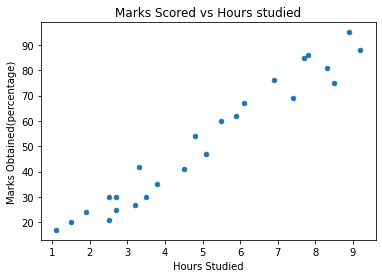

In [5]:
data.plot(x="Hours", y="Scores", kind="scatter")
plt.title("Marks Scored vs Hours studied")
plt.xlabel('Hours Studied')  
plt.ylabel('Marks Obtained(percentage)')  
plt.show()

**It can be inferred from the above scatter plot that there is a positive relationship between the two variables. When Number of hours studied is increasing, marks scored is also increasing.**

Now , we will divide the data into labels(Y) and attributes(X).








In [6]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

Now, we will split the obtained labels and attributes into training set and test set using scikit-Learn. We will use 70% data for training the algorithm and 30 % will be left for testing.

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test= train_test_split(X, y, train_size=0.7, random_state=0 )


**Training using linear regression model**

In [8]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train, y_train)
print("Trained")


Trained


**plotting the regression line**

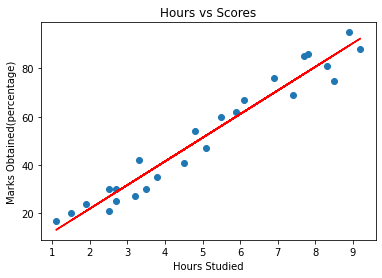

In [9]:
line= lr.coef_*X + lr.intercept_
plt.scatter(X, y,)
plt.plot(X,line,"r")
plt.xlabel('Hours Studied')  
plt.ylabel('Marks Obtained(percentage)')
plt.title("Hours vs Scores")
plt.show()

In the above obtained graph, the straight line represents the predicted values and the dots represents true value.

**PREDICTIONS**

In [10]:
print("Testing Data(Hours) \n",X_test)

Testing Data(Hours) 
 [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [11]:
y_pred=lr.predict(X_test) #predicting values
df=pd.DataFrame({"Actual Scores": y_test, "Predicted Scores":y_pred})
print(df)


   Actual Scores  Predicted Scores
0             20         17.053665
1             27         33.694229
2             69         74.806209
3             30         26.842232
4             62         60.123359
5             35         39.567369
6             24         20.969092
7             86         78.721636


**Predicting Score when hours=9.25**

In [12]:
#predicting marks when hours=9.25
hr= 9.25
y1= lr.predict([[hr]])
print("No.of hours studied: ",hr)
print("Predicted Score: ",y1[0])



No.of hours studied:  9.25
Predicted Score:  92.91505723477056


**Model Evaluation** - To check how well the model predicts the values

In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Maximum Error: ',metrics.max_error(y_test, y_pred))
print('Accuracy: ',lr.score(X_test, y_test)*100,"%")

Mean Absolute Error: 4.419727808027651
Mean Squared Error: 22.965097212700428
Maximum Error:  7.27836446101557
Accuracy:  95.68211104435257 %


**It can be inferred from above results that the model is approximately 95% accurate.**